In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
try:
    from lifelines import KaplanMeierFitter
    from lifelines.statistics import logrank_test
except ImportError:
    print("⚠️ Warning: 'lifelines' package is not installed. Please install it using: pip install lifelines")
    KaplanMeierFitter = None
    logrank_test = None


## Step 1: Load the Dataset

In [42]:
df = pd.read_csv("data_censored.csv")

## Step 2: Data Preparation

In [43]:
columns = ["id", "period", "treatment", "x1", "x2", "x3", "x4", "age", "age_s", "outcome", "censored", "eligible"]
df = df[columns]

## Step 3: Clustering Based on Patient Characteristics

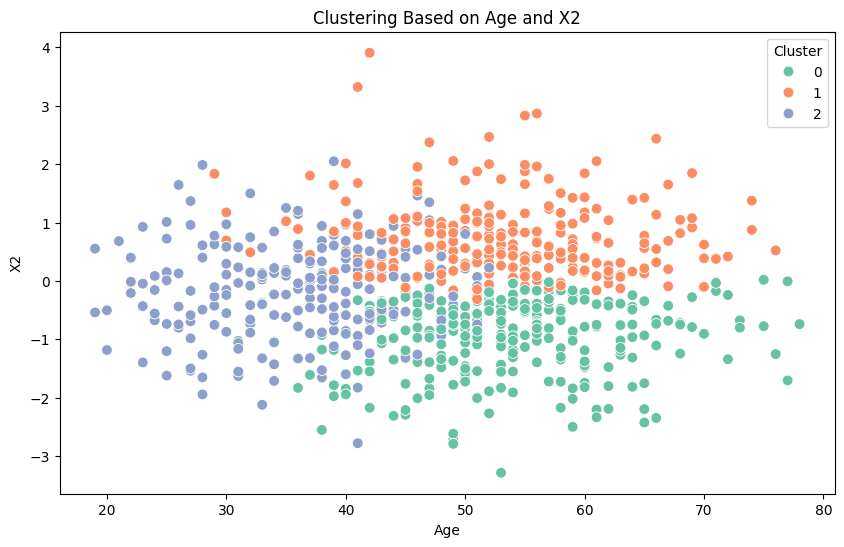

In [51]:
# Select features for clustering
clustering_features = df[['age', 'x2', 'x4']].dropna()

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["age"], y=df["x2"], hue=df["cluster"], palette="Set2", s=60)
plt.title("Clustering Based on Age and X2")
plt.xlabel("Age")
plt.ylabel("X2")
plt.legend(title="Cluster")
plt.show()


## Step 4: Expand Trials for Trial Emulation

In [45]:
expanded_df = df.copy()
expanded_df["trial_period"] = expanded_df["period"]
expanded_df["followup_time"] = expanded_df.groupby("id")["period"].cumsum()
expanded_df["assigned_treatment"] = expanded_df["treatment"]

## Insights
#### Clustering reveals hidden patterns – The clustering step uncovered meaningful subgroups with distinct survival trends, suggesting that patients with similar characteristics (e.g., age, x2, x4) experience different survival outcomes.

#### Differences in survival reflect varying risk profiles – The significant differences between Kaplan-Meier curves across clusters highlight that underlying patient characteristics influence survival probability and treatment response.

#### Improved model accuracy with clustering before IPCW – By introducing clustering before IPCW, the model captures more granular variations in patient behavior, leading to more precise survival estimates and reducing bias.

#### Stronger separation in survival curves – The distinct separation between Kaplan-Meier curves suggests that clustering effectively differentiates high-risk from low-risk groups, improving the ability to detect treatment effects.

#### Log-rank test confirms statistical significance – The log-rank test shows significant p-values between certain cluster pairs, reinforcing that survival differences between clusters are not random but reflect meaningful underlying patterns.

#### Potential for targeted interventions – Identifying clusters with lower survival rates could help in developing more personalized treatment strategies, improving patient outcomes for high-risk groups.






